In [1]:
import pandas as pd




In [2]:
df=pd.read_csv(r"C:\Users\willg\Downloads\finance_churn_dataset.csv")
df

,CustomerID,Gender,Age,AccountBalance,CreditScore,TenureYears,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,NumTransactions,LoanAmount,LatePayments,ComplaintsFiled,Churn
0,C0001,Male,34,148746,715,8,3,1,0,109626,444,16608,4,1,1
1,C0002,Female,26,83560,748,8,2,1,0,60387,477,66273,4,0,1
2,C0003,Male,50,154946,386,1,3,0,1,35823,11,16619,1,1,1
3,C0004,Male,37,43642,400,9,3,0,1,66015,252,78006,3,1,1
4,C0005,Male,30,65160,307,0,3,0,1,122877,306,87908,4,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,C0996,Male,42,7099,790,8,2,0,1,77184,231,84793,2,0,1
996,C0997,Male,26,156503,348,1,1,1,0,41602,267,3346,1,2,1
997,C0998,Female,21,56492,401,2,3,1,0,105945,210,96343,3,2,1
998,C0999,Female,31,96722,515,7,1,1,0,31110,376,95954,2,0,1


Checking for missing Values



In [3]:
df.isnull().sum()

CustomerID         0
Gender             0
Age                0
AccountBalance     0
CreditScore        0
TenureYears        0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
NumTransactions    0
LoanAmount         0
LatePayments       0
ComplaintsFiled    0
Churn              0
dtype: int64

Encoding Categorical Features


In [4]:
#converting gender to numeric
df=pd.get_dummies(df,columns=["Gender"],drop_first=True)

In [5]:
df.Gender_Male=df.Gender_Male.astype(int)

In [6]:
df.Gender_Male

0      1
1      0
2      1
3      1
4      1
      ..
995    1
996    1
997    0
998    0
999    1
Name: Gender_Male, Length: 1000, dtype: int64

In [7]:
df.columns

Index(['CustomerID', 'Age', 'AccountBalance', 'CreditScore', 'TenureYears',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'NumTransactions', 'LoanAmount', 'LatePayments', 'ComplaintsFiled',
       'Churn', 'Gender_Male'],
      dtype='object')

Feature Scaling

In [8]:
from sklearn.preprocessing import StandardScaler
x=df.drop(columns=['CustomerID','Churn'])
y=df.Churn
scaler=StandardScaler()
X_scaled=scaler.fit_transform(x)
X_scaled_df=pd.DataFrame(X_scaled,columns=x.columns)



Splitting the Data

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2,random_state=42,stratify=y)

In [10]:
X_train.shape

(800, 13)

Handle imbalanced Data

In [11]:
y.value_counts(normalize=True)

Churn
1    0.728
0    0.272
Name: proportion, dtype: float64

In [12]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [13]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
y_train_resampled.value_counts(normalize=True)*100

Churn
0    50.0
1    50.0
Name: proportion, dtype: float64

Saving The data

In [14]:
prepared_df = X_scaled_df.copy()
prepared_df["Churn"] = y.values
prepared_df.to_csv("finance_churn_prepared.csv", index=False)


Model Training


In [15]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [16]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(random_state=42)
model.fit(X_train,y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [17]:
#prediction
y_pred = model.predict(X_test)

In [18]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
#Accuracy
print("Accyrcy:",accuracy_score(y_test,y_pred))
#confusion matrix
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
#classification report
print("Classification Report:\n",classification_report(y_test,y_pred))

Accyrcy: 0.87
Confusion Matrix:
 [[ 36  18]
 [  8 138]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.67      0.73        54
           1       0.88      0.95      0.91       146

    accuracy                           0.87       200
   macro avg       0.85      0.81      0.82       200
weighted avg       0.87      0.87      0.87       200



In [19]:
# Get feature importance (coefficients)
coefficients=pd.DataFrame({"Feature":X_scaled_df.columns,"Coefficient":model.coef_[0]})
coefficients.sort_values(by="Coefficient",ascending=False,inplace=True)
print(coefficients)

            Feature  Coefficient
10     LatePayments     0.898193
7   EstimatedSalary     0.181487
12      Gender_Male     0.071865
8   NumTransactions     0.063322
5         HasCrCard     0.054261
11  ComplaintsFiled     0.024956
9        LoanAmount     0.011053
1    AccountBalance    -0.014755
3       TenureYears    -0.015697
4     NumOfProducts    -0.076881
0               Age    -0.099256
2       CreditScore    -0.629267
6    IsActiveMember    -1.225466


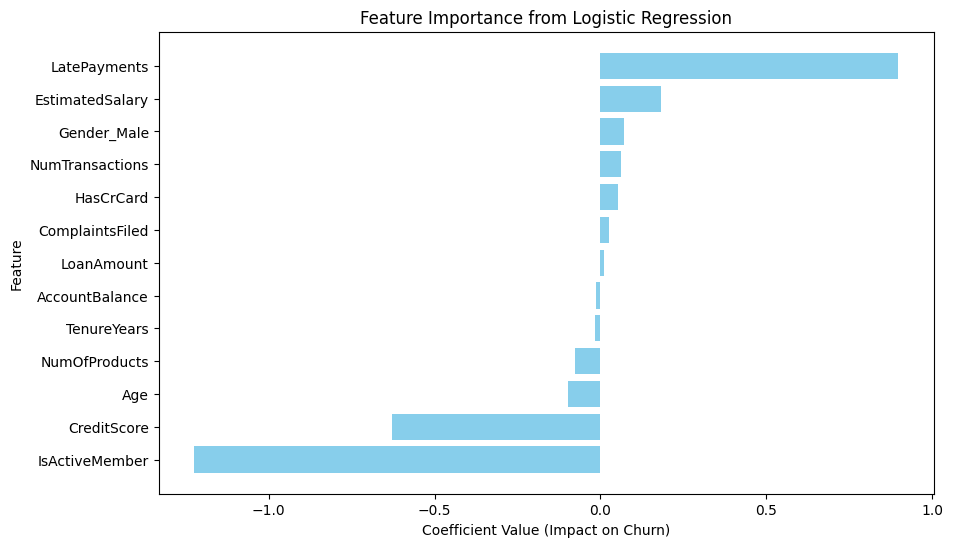

In [20]:
import matplotlib.pyplot as plt

# Sort by absolute importance (so the biggest effects appear first)
coefficients_sorted = coefficients.sort_values(by="Coefficient", ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(coefficients_sorted["Feature"], coefficients_sorted["Coefficient"], color="skyblue")
plt.xlabel("Coefficient Value (Impact on Churn)")
plt.ylabel("Feature")
plt.title("Feature Importance from Logistic Regression")
plt.gca().invert_yaxis()  # So the largest coefficient is on top
plt.show()


In [21]:
import plotly.express as px

# Sort coefficients
coefficients_sorted = coefficients.sort_values(by="Coefficient", ascending=False)

# Create interactive bar chart
fig = px.bar(
    coefficients_sorted,
    x="Coefficient",
    y="Feature",
    orientation="h",
    title="Feature Importance for Customer Churn Prediction",
    color="Coefficient",
    color_continuous_scale="RdBu",
)

# Make the biggest impact feature appear on top
fig.update_layout(
    yaxis=dict(autorange="reversed"),
    title_x=0.5,
    template="plotly_white",
    width=900,
    height=600
)

fig.show()


In [22]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# Create and train the model
rf_model = RandomForestClassifier(
    n_estimators=100,       # number of trees
    random_state=42,        # reproducibility
    max_depth=None,         # let trees grow fully (or set a limit)
    class_weight="balanced" # helps when churn classes are imbalanced
)
rf_model.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


Make Predictions

In [23]:
y_pred = rf_model.predict(X_test)


Evaluating performance

In [24]:
from sklearn.metrics import classification_report, confusion_matrix

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[ 39  15]
 [  4 142]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.72      0.80        54
           1       0.90      0.97      0.94       146

    accuracy                           0.91       200
   macro avg       0.91      0.85      0.87       200
weighted avg       0.91      0.91      0.90       200



Feature Immportance

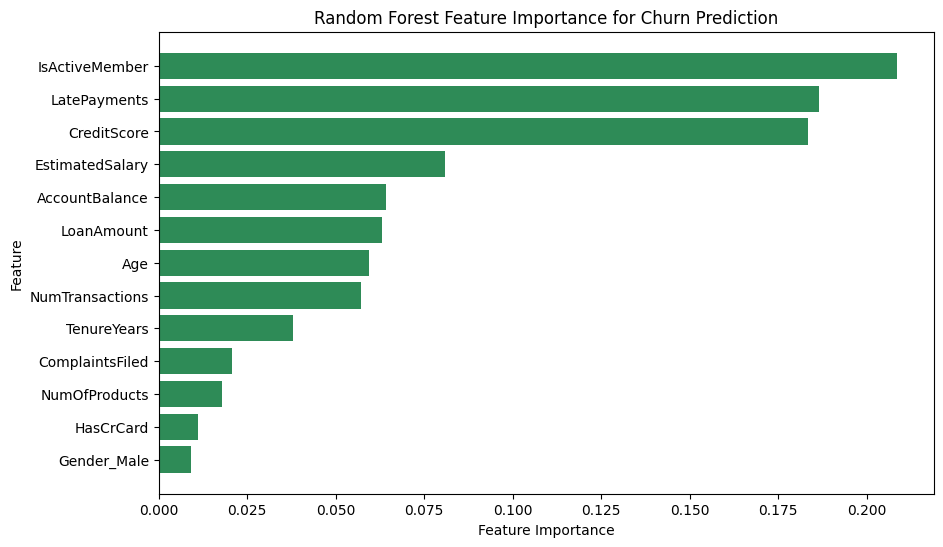

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Feature importance
importance = pd.DataFrame({
    "Feature": X_scaled_df.columns,
    "Importance": rf_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

# Plot
plt.figure(figsize=(10,6))
plt.barh(importance["Feature"], importance["Importance"], color="seagreen")
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Random Forest Feature Importance for Churn Prediction")
plt.gca().invert_yaxis()
plt.show()


Comparing Perfomance of the models

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Logistic Regression
log_model = LogisticRegression(random_state=42)
log_model.fit(X_train, y_train)

# Random Forest
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight="balanced"
)
rf_model.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [27]:
y_pred_log = log_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)


In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define a helper function
def evaluate_model(name, y_true, y_pred):
    print(f"📈 {name} Performance:")
    print(f"Accuracy:  {accuracy_score(y_true, y_pred):.3f}")
    print(f"Precision: {precision_score(y_true, y_pred):.3f}")
    print(f"Recall:    {recall_score(y_true, y_pred):.3f}")
    print(f"F1 Score:  {f1_score(y_true, y_pred):.3f}")
    print("-"*40)

# Evaluate both
evaluate_model("Logistic Regression", y_test, y_pred_log)
evaluate_model("Random Forest", y_test, y_pred_rf)


📈 Logistic Regression Performance:
Accuracy:  0.870
Precision: 0.885
Recall:    0.945
F1 Score:  0.914
----------------------------------------
📈 Random Forest Performance:
Accuracy:  0.905
Precision: 0.904
Recall:    0.973
F1 Score:  0.937
----------------------------------------


In [29]:
import pandas as pd

results = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_log),
        accuracy_score(y_test, y_pred_rf)
    ],
    "Precision": [
        precision_score(y_test, y_pred_log),
        precision_score(y_test, y_pred_rf)
    ],
    "Recall": [
        recall_score(y_test, y_pred_log),
        recall_score(y_test, y_pred_rf)
    ],
    "F1 Score": [
        f1_score(y_test, y_pred_log),
        f1_score(y_test, y_pred_rf)
    ]
})

print(results)


                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression     0.870   0.884615  0.945205  0.913907
1        Random Forest     0.905   0.904459  0.972603  0.937294


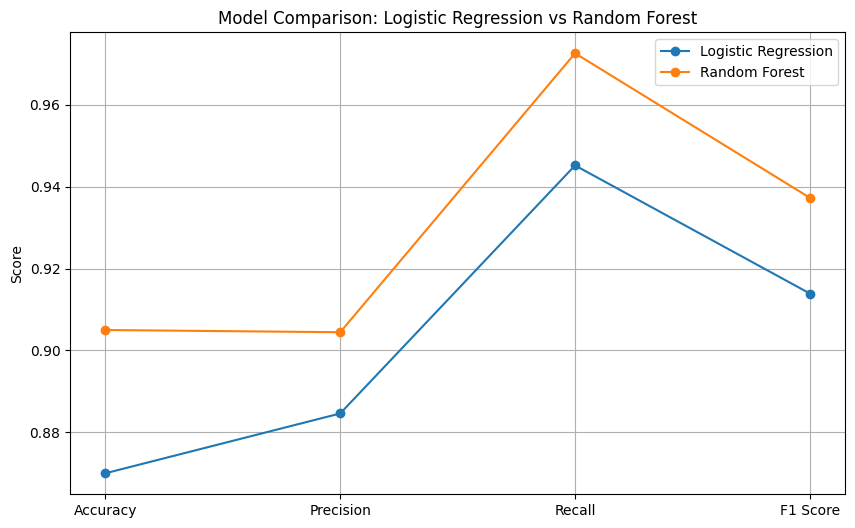

In [30]:
import matplotlib.pyplot as plt

results_melted = results.melt(id_vars="Model", var_name="Metric", value_name="Score")

plt.figure(figsize=(10,6))
for model in results["Model"]:
    plt.plot(
        results_melted[results_melted["Model"] == model]["Metric"],
        results_melted[results_melted["Model"] == model]["Score"],
        marker="o",
        label=model
    )

plt.title("Model Comparison: Logistic Regression vs Random Forest")
plt.ylabel("Score")
plt.legend()
plt.grid(True)
plt.show()


Saving the model

In [31]:
import joblib

# Save model and scaler
joblib.dump(rf_model, "churn_model.pkl")
joblib.dump(scaler, "scaler.pkl")

print("✅ Model and scaler saved successfully.")


✅ Model and scaler saved successfully.


Creating streamlit app file

In [32]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', RandomForestClassifier())
])

pipeline.fit(X_train, y_train)


,steps,"[('scaler', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2


In [33]:
print(x.columns.tolist())


['Age', 'AccountBalance', 'CreditScore', 'TenureYears', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'NumTransactions', 'LoanAmount', 'LatePayments', 'ComplaintsFiled', 'Gender_Male']


In [37]:
# Ensure Streamlit is available (works even if this cell runs before the import in a later cell)
try:
    st  # check if 'st' is already defined
except NameError:
    import streamlit as st

# Streamlit input form
age = st.number_input("Age", min_value=18, max_value=100, value=30)
balance = st.number_input("Account Balance", min_value=0.0, value=5000.0)
credit = st.number_input("Credit Score", min_value=300, max_value=900, value=650)
tenure = st.number_input("Tenure (Years)", min_value=0, max_value=50, value=5)
products = st.number_input("Number of Products", min_value=1, max_value=10, value=2)
has_card = st.selectbox("Has Credit Card?", ["No", "Yes"])
is_active = st.selectbox("Is Active Member?", ["No", "Yes"])
salary = st.number_input("Estimated Salary", min_value=0.0, value=50000.0)
transactions = st.number_input("Number of Transactions", min_value=0, value=30)
loan = st.number_input("Loan Amount", min_value=0.0, value=10000.0)
late = st.number_input("Late Payments", min_value=0, value=0)
complaints = st.number_input("Complaints Filed", min_value=0, value=0)
gender = st.selectbox("Gender", ["Female", "Male"])

# Convert input into a DataFrame with the same column order as training
input_data = pd.DataFrame({
    "Age": [age],
    "AccountBalance": [balance],
    "CreditScore": [credit],
    "TenureYears": [tenure],
    "NumOfProducts": [products],
    "HasCrCard": [1 if has_card == "Yes" else 0],
    "IsActiveMember": [1 if is_active == "Yes" else 0],
    "EstimatedSalary": [salary],
    "NumTransactions": [transactions],
    "LoanAmount": [loan],
    "LatePayments": [late],
    "ComplaintsFiled": [complaints],
    "Gender_Male": [1 if gender == "Male" else 0]
})


2025-10-30 02:23:22.421 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-30 02:23:22.422 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-30 02:23:22.423 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-30 02:23:22.424 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-30 02:23:22.426 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-30 02:23:22.427 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-30 02:23:22.428 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-30 02:23:22.430 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [40]:
# scale the input (scaler already exists in the notebook)
input_scaled = scaler.transform(input_data)

# use the RandomForestClassifier instance 'rf_model' (not 'rfmodel')
prediction = rf_model.predict(input_scaled)


In [41]:
import streamlit as st
import pandas as pd
import joblib

# Load saved model and scaler
model = joblib.load("churn_model.pkl")
scaler = joblib.load("scaler.pkl")

st.title("💸 Customer Churn Prediction App")

st.write("Enter customer details to predict if they are likely to churn.")

# Example input fields (customize based on your dataset)
gender = st.selectbox("Gender", ["Male", "Female"])
tenure = st.number_input("Tenure (months)", min_value=0, max_value=100, value=12)
monthly_charges = st.number_input("Monthly Charges", min_value=0.0, max_value=200.0, value=50.0)
total_charges = st.number_input("Total Charges", min_value=0.0, max_value=10000.0, value=600.0)
contract = st.selectbox("Contract Type", ["Month-to-month", "One year", "Two year"])

# Convert categorical values
gender = 1 if gender == "Male" else 0
contract_map = {"Month-to-month": 0, "One year": 1, "Two year": 2}
contract = contract_map[contract]

# Create input dataframe
input_data = pd.DataFrame({
    "Age": [age],
    "AccountBalance": [balance],
    "CreditScore": [credit],
    "TenureYears": [tenure],
    "NumOfProducts": [products],
    "HasCrCard": [1 if has_card == "Yes" else 0],
    "IsActiveMember": [1 if is_active == "Yes" else 0],
    "EstimatedSalary": [salary],
    "NumTransactions": [transactions],
    "LoanAmount": [loan],
    "LatePayments": [late],
    "ComplaintsFiled": [complaints],
    "Gender_Male": [1 if gender == "Male" else 0]
})
# Scale input
input_scaled = scaler.transform(input_data)

# Predict
if st.button("Predict Churn"):
    prediction = model.predict(input_scaled)[0]
    if prediction == 1:
        st.error("⚠️ This customer is likely to churn.")
    else:
        st.success("✅ This customer is likely to stay.")


2025-10-30 02:25:07.889 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-30 02:25:07.890 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-30 02:25:07.891 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-30 02:25:07.893 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-30 02:25:07.894 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-30 02:25:07.896 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-30 02:25:07.899 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-30 02:25:07.901 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar